# Importing modules and dataset

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Data/Train.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Data Cleaning

In [6]:
#dropping unnecessary columns
df.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


__FILLING MISSING VALUES__

In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df['location'].value_counts()

Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
Gulakamale               1
Anathanagar              1
Hullahalli               1
CQAL LAYOUT C BLOCK      1
Kumbhena Agrahara        1
Name: location, Length: 1305, dtype: int64

__Since most of the houses are located in Whitefield location, we are going to fill the missing value of location with Whitefield__

In [10]:
#filling missing values
df['location']=df['location'].fillna(df['location'].mode()[0])

In [11]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
18 Bedroom       1
16 BHK           1
27 BHK           1
19 BHK           1
43 Bedroom       1
13 BHK           1
12 Bedroom       1
14 BHK           1
Name: size, dtype: int64

__Since most of the houses have 2 BHK, we are going to fill the missing values of size with 2 BHK__

In [12]:
#filling missing values
df['size']=df['size'].fillna(df['size'].mode()[0])

In [13]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

__Since most of the houses have 2 bathrooms, we are going to fill the missing values of bath with median of it__

In [14]:
#filling missing values
df['bath']=df['bath'].fillna(df['bath'].median())

In [15]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
#splitting bhk from size
df['BHK']=df['size'].str.split(' ').str[0].astype(int)

In [17]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

__There are ranges in total sqft so we are going to split it and take mean of the two values__

In [18]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft_tonum)

In [19]:
#adding new feature
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats=df['location'].value_counts()
location_stats_less_than_10=location_stats[location_stats<=10]

In [21]:
location_stats_less_than_10

Kalkere                  10
Dodsworth Layout         10
1st Block Koramangala    10
Sector 1 HSR Layout      10
BTM 1st Stage            10
                         ..
Maruthi Extension         1
Jagadish Nagar            1
Arekempanahalli           1
Hal old airport road      1
Kumbhena Agrahara         1
Name: location, Length: 1053, dtype: int64

In [22]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [23]:
df['location'].value_counts()

other               2885
Whitefield           542
Sarjapur  Road       399
Electronic City      304
Kanakpura Road       273
                    ... 
Thyagaraja Nagar      11
Tindlu                11
Banjara Layout        11
Nehru Nagar           11
Marsur                11
Name: location, Length: 242, dtype: int64

In [24]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [26]:
#keeping only those values whose sqft is more than 300
df=df[((df['total_sqft']/df['BHK']) >=300)]
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [27]:
df.shape

(12530, 7)

In [28]:
def remove_outliers_from_sqft(df):
    df_out=pd.DataFrame()
    for key,sub in df.groupby('location'):
        m=np.mean(sub.price_per_sqft)
        std=np.std(sub.price_per_sqft)
        reduce_df=sub[(sub.price_per_sqft>(m-std)) & (sub.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df=remove_outliers_from_sqft(df)

In [29]:
def bhk_outliers_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df=bhk_outliers_remover(df)

In [30]:
df.drop(['size','price_per_sqft'],axis=1,inplace=True)

In [31]:
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [32]:
# #checking for duplicates value
# df.duplicated().sum()

# # dropping duplicate
# df.drop_duplicates(inplace=True)

# Data Visualisation

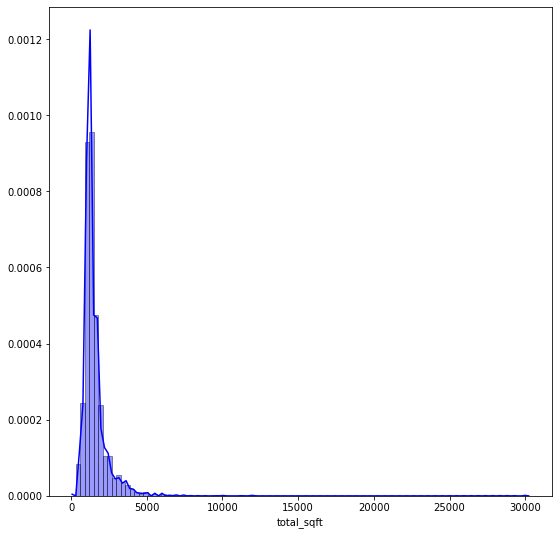

In [33]:
#visualising total sqft distribution plot
plt.figure(figsize=(9,9))
sns.distplot(df["total_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

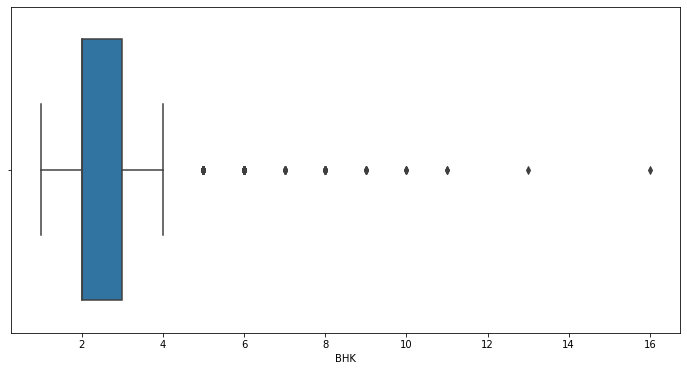

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="BHK",data=df)

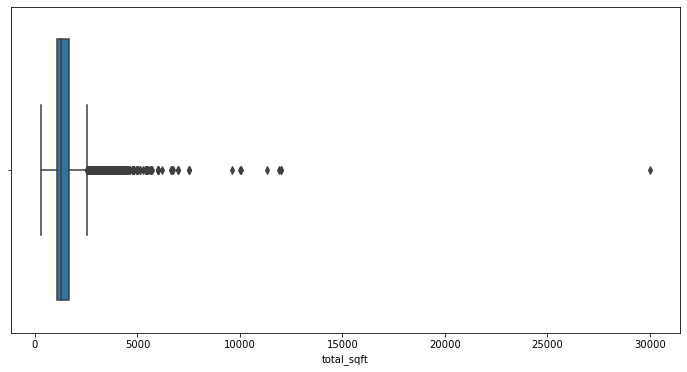

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="total_sqft",data=df)

In [36]:
# Frequency for each loaction
location_freq = pd.Series(df.location.value_counts()).head(25)
locations = pd.DataFrame(location_freq).reset_index().rename(columns={'index':'location','location':'frequency'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

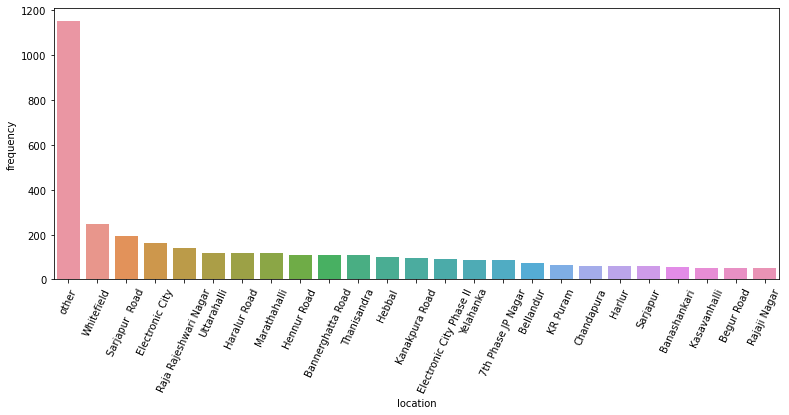

In [37]:
plt.figure(figsize=(13,5))
sns.barplot(locations['location'],locations['frequency'])
plt.xticks(rotation=65)

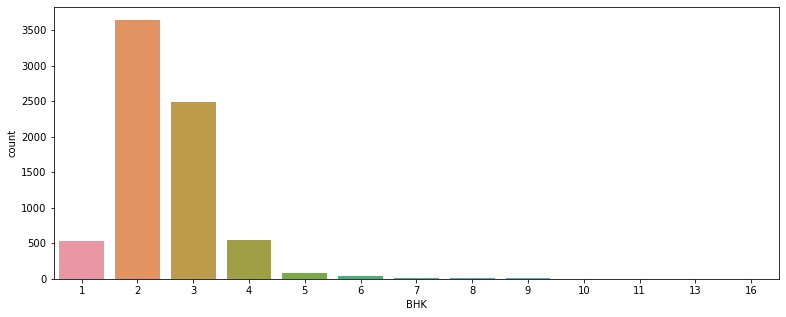

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(x='BHK',data=df)

Most house have 2 or 3 BHK

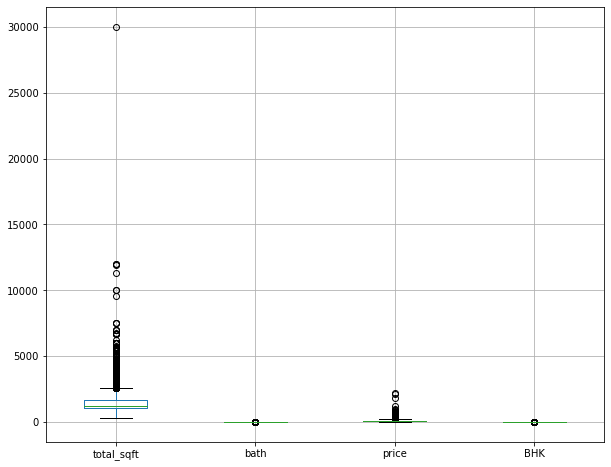

In [39]:
# Boxplot for outlier analysis
plt.figure(figsize=(10,8))
df.boxplot()

# Corelation Matrix

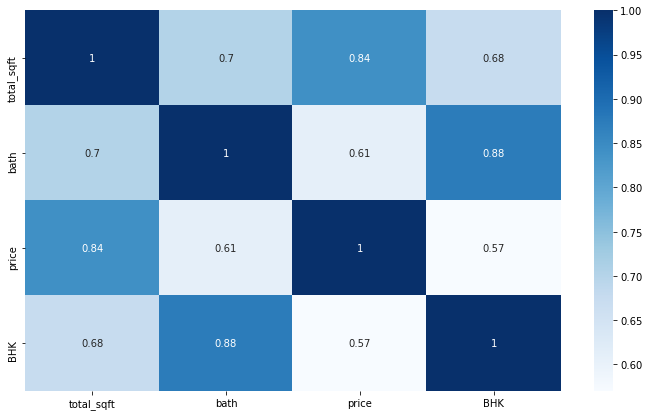

In [40]:
corr=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='Blues')

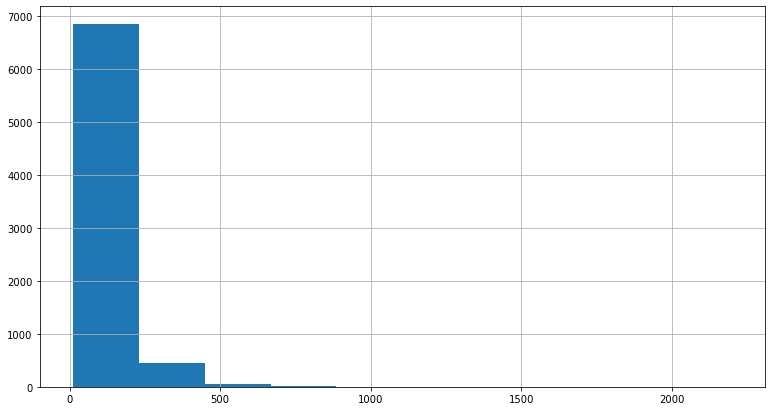

In [41]:
plt.figure(figsize=(13,7))
df['price'].hist()
plt.show()

In [53]:
df.to_csv('cleaned_data.csv')

# Trian  Test Split

In [42]:
X=df.drop('price',axis=1)
y=df['price']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [45]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')
scaler=StandardScaler()

# Linear Regresssion

In [46]:
lr=LinearRegression(normalize=True)
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.8252461287861277

# Ridge

In [47]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8252348502290119

# Lasso

In [48]:
lasso=Lasso()
pipe=make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8146894751690389

In [49]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))

In [52]:
np.sqrt(np.square(np.log10(y_pred_ridge +1) - np.log10(y_test +1)).mean())

0.13955374342529445